Build the linear regression model using scikit learn in boston data to predict 'Price'
based on other dependent variable.
Here is the code to load the data


In [51]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression

boston = load_boston()

#converting index of boston data to columns
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [52]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [53]:
#actual data
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [54]:
#columns
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [55]:
#target column - here it is Price 
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [56]:
# description of data
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [57]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [58]:
#create a column Price  and assign target values to it
bos['PRICE']  = boston.target

#make sure Price column is added
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


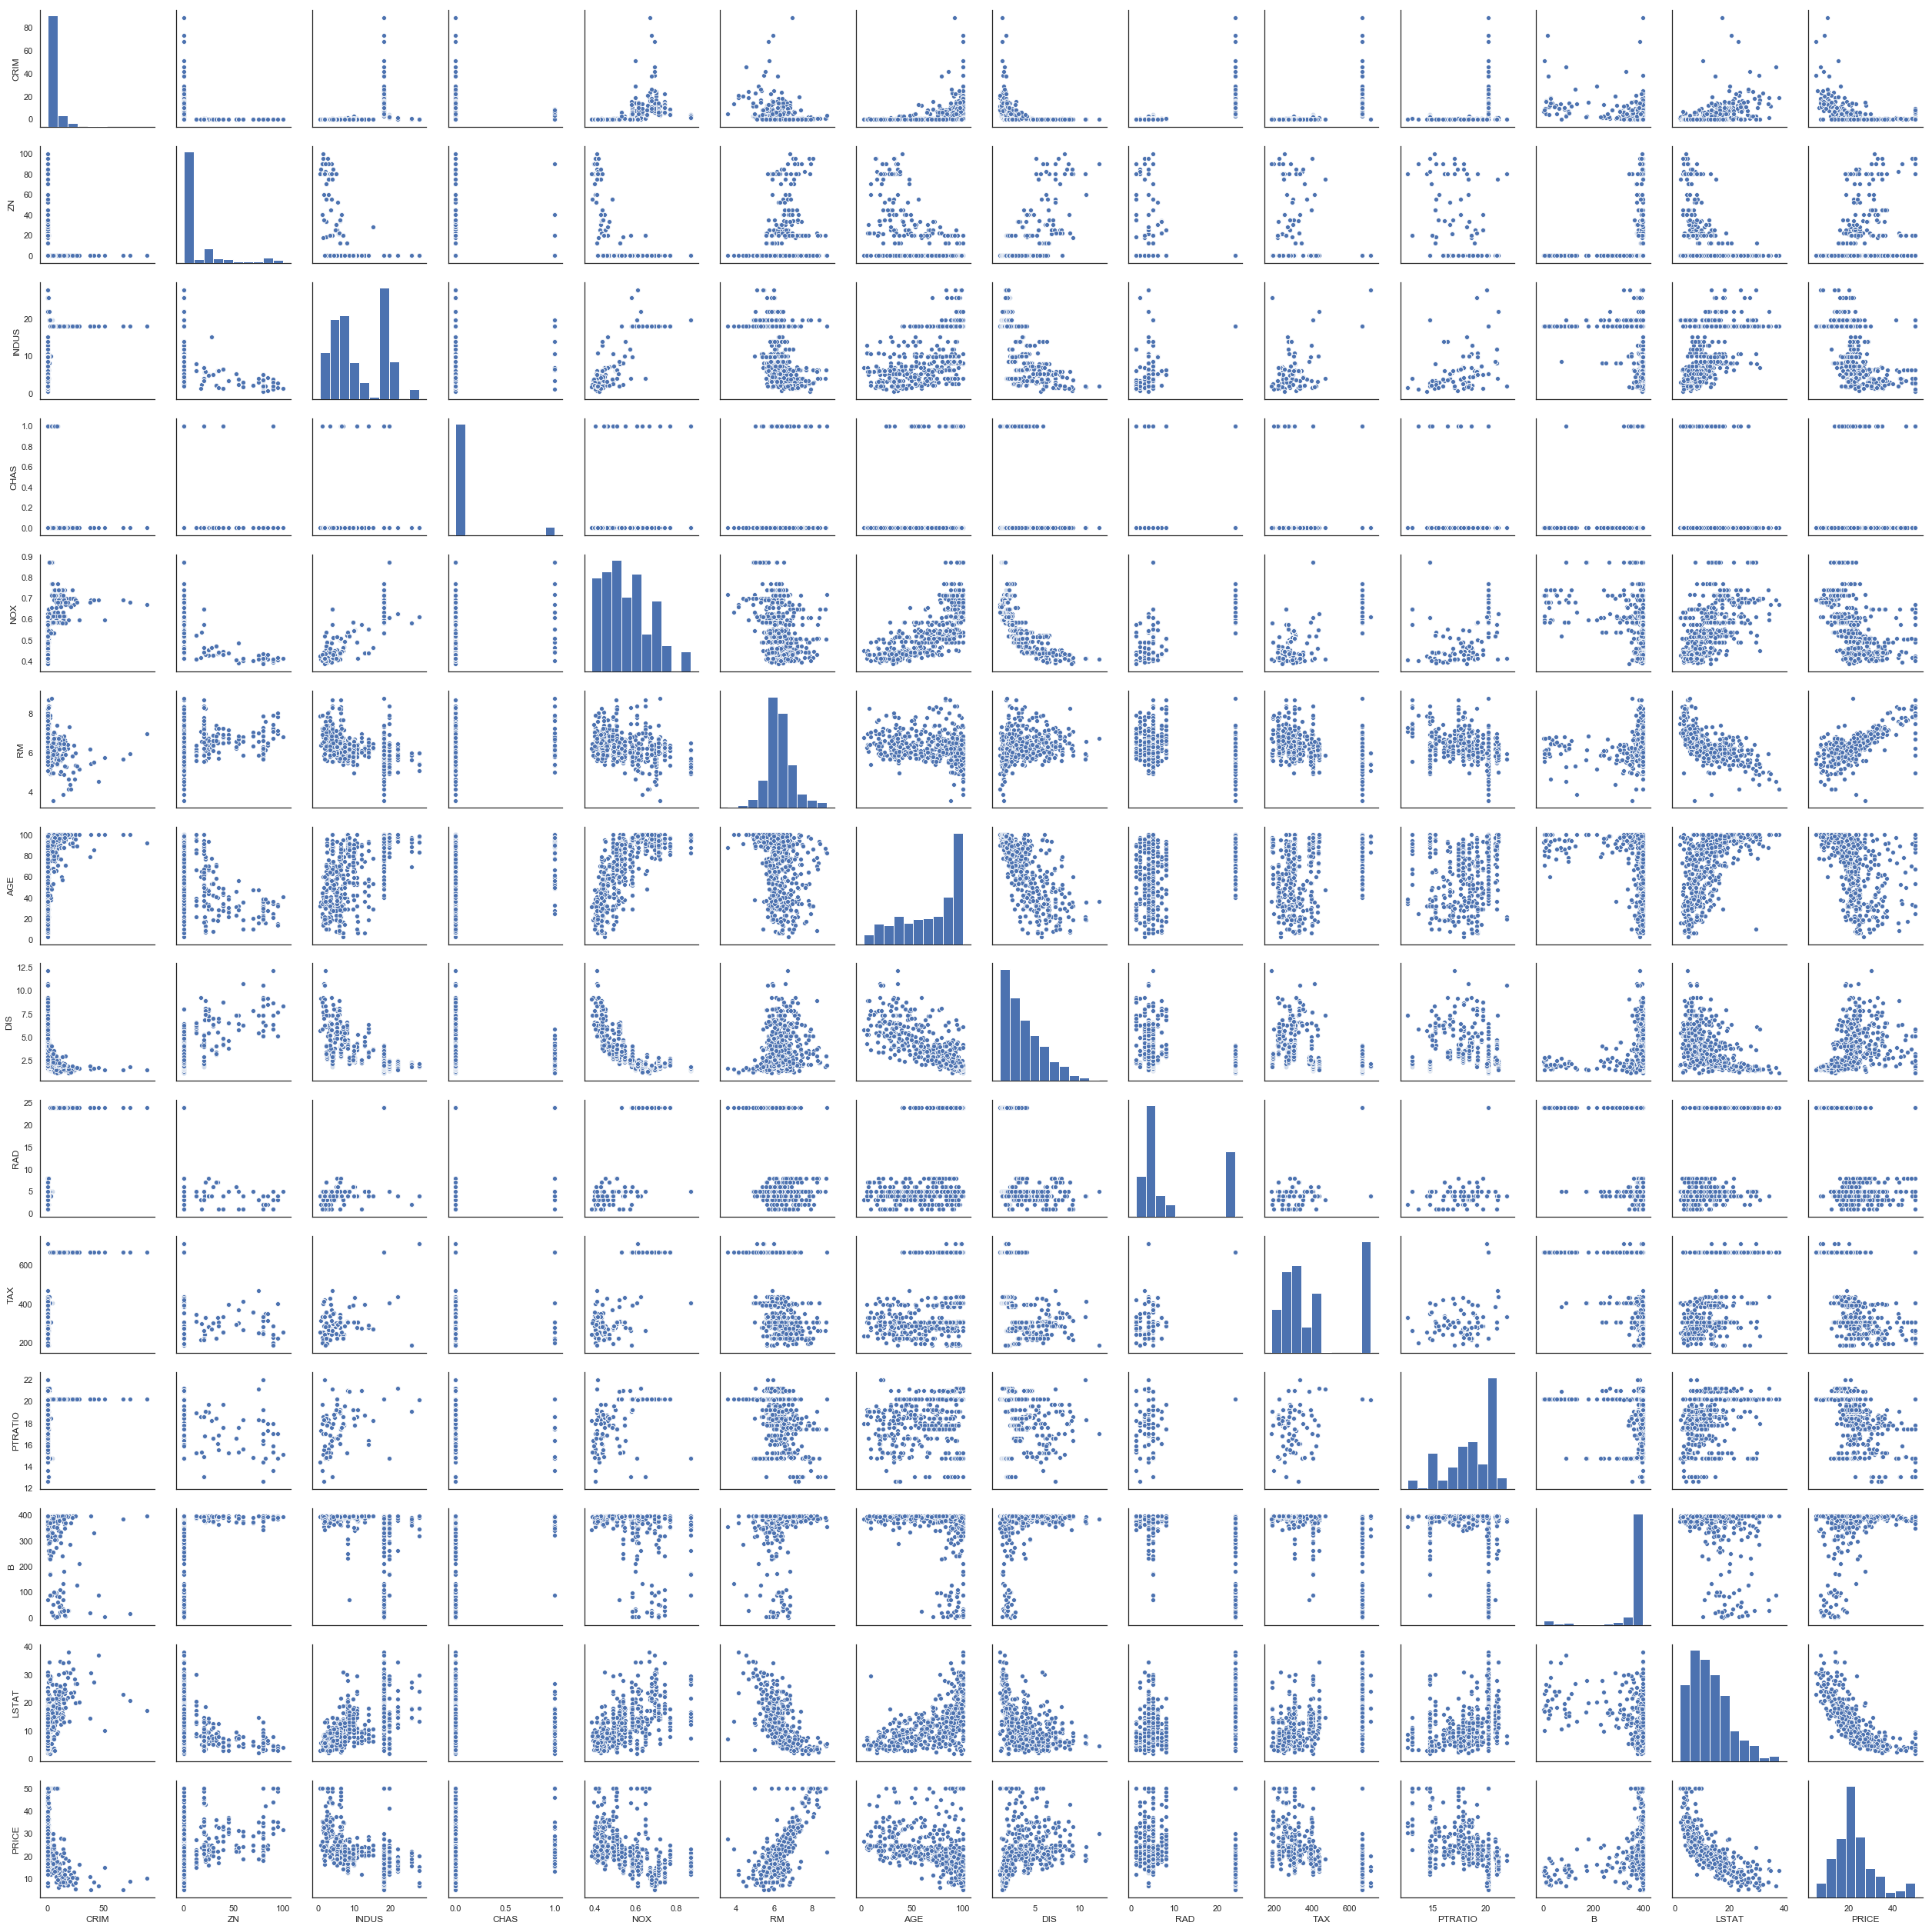

In [59]:
import seaborn as sns

sns.pairplot(bos) #Plots pairwise relationships in a dataset.

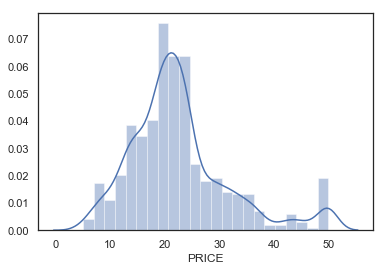

In [60]:
sns.distplot(bos['PRICE']) #Flexibly plot a univariate distribution of observations.

In [61]:
#check correleation between features and target to find the relationship between variables. 
bos[bos.columns[:]].corr()['PRICE'][:]

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
PRICE      1.000000
Name: PRICE, dtype: float64

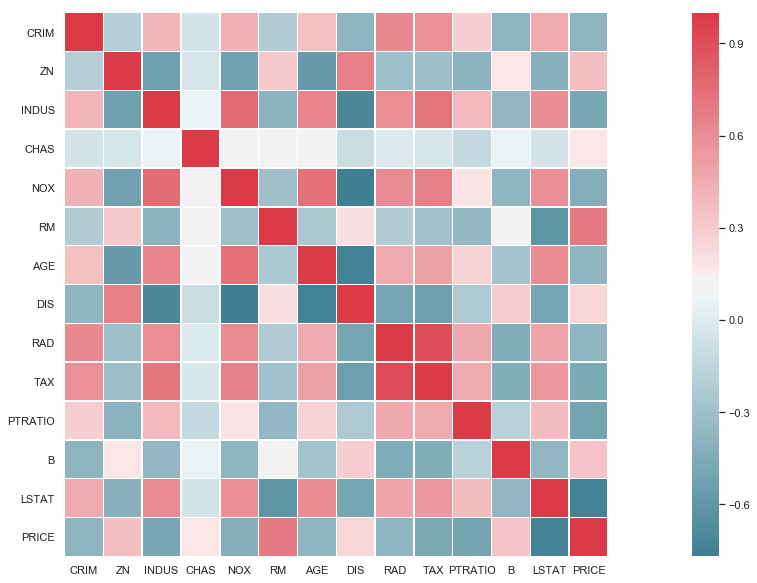

In [62]:
#Correlation Matrix
sns.set(style="white")
df_corr= bos[:]
corr = df_corr.dropna().corr() #Compute the correlation matrix
mask = np.zeros_like(corr, dtype=np.bool) #Generate a mask 
f, ax = plt.subplots(figsize=(30, 10)) #Set up the matplotlib figure
cmap = sns.diverging_palette(220, 10, as_cmap=True) #Generate a custom diverging colormap
sns.heatmap(corr, mask=mask, cmap=cmap, square=True, linewidths=.5, ax=ax) #Draw the heatmap with the mask and correct aspect ratio
#RAD and TAX are highly co-related.
#Price negatively corelated with LSTAT(Strong),PTRATIO(Strong),TAX(high), INDUS(High), CRIM(Highly) and 
#NOX highly corelated with RM.
#Also Price positively corelated with RM(High), ZN(High), CHAS(Medium), DIS(MEDIUM) & B(Medium)

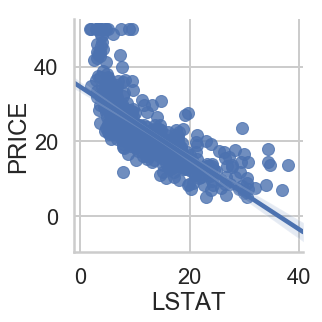

In [103]:
#Based on above analysis, taking LSTAT as one of the predictors with target PRICE 
#to figure relationship between them on how much linear it is. 
sns.lmplot(x="LSTAT", y="PRICE", data=bos)

## Data cleaning

In [7]:
#make sure it doesnt have null values

bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

## Train, Test & split

In [64]:
#split the data into target and predictor values

X =  bos.drop('PRICE', axis = 1)
y = bos['PRICE']

## Train data and Test data

In [77]:
import sklearn.model_selection as skmodel
X_train, X_test, y_train, y_test = skmodel.train_test_split(X, y, test_size = 0.3, random_state = 2)
print(X.shape)
print(y.shape)
print(X_train.shape) # 70% training data
print(X_test.shape) # 70% test data
print(y_train.shape) # 30% train data
print(y_test.shape) #30% test data

(506, 13)
(506,)
(354, 13)
(152, 13)
(354,)
(152,)


## Create and fit model

In [80]:
#Here we use liner regression since the target value is continous data

lm = LinearRegression()
lm.fit(X_train, y_train)

#Intercept value
print(lm.intercept_)

#Coefficient values
print(lm.coef_)

37.16254129502887
[-9.32979504e-02  3.11368143e-02 -1.81754255e-02  3.19555762e+00
 -1.51042926e+01  3.50102142e+00  1.89769212e-02 -1.26552555e+00
  3.22156319e-01 -1.09456764e-02 -1.08963451e+00  1.25396786e-02
 -6.07618971e-01]


## Predict Price using test data

In [82]:
#predict with new data

y_predict = lm.predict(X_test)
y_predict

array([23.60107664, 22.04294254, 32.92377058, 31.91022563,  2.99227543,
        2.30931786, 27.24307664, 22.22378555, 15.63121244, 22.01776894,
       30.9081731 , 26.25867172, 20.98500214, 18.08561794, 17.48148297,
       25.66225133, 24.17903047, 13.46872099,  8.11358881, 18.98082595,
       21.86465498, 20.25622265, 36.91155565, 20.90909029, 20.24640709,
       15.37190713, 37.80616835, 34.6731445 , 30.31794568, 23.04231982,
       18.92214187, 20.75992822, 31.34205264, 29.76580943, 13.8418402 ,
       16.3196928 , 13.75124615, 24.26067475, 25.9231117 , 22.99977788,
       28.75660688, 12.3235743 , 31.16617755,  6.53718251, 23.88496902,
       20.92276495, 33.16629819, 19.57388844, 36.464448  ,  0.10366224,
       32.10365338, 31.71501622,  6.71303034, 34.63579086, 20.89498886,
       19.84248247, 19.63295005, 18.5086544 , 15.86301943, 22.63989081,
       19.71274635, 16.11818655, 18.44773944, 32.47889806, 35.32691618,
       24.55178159, 40.85972609, 33.06546131, 14.79984596, 27.22

In [84]:
#Confidence in our Model
import statsmodels.formula.api as smf
lm = smf.ols(formula='PRICE ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=bos).fit()
lm.conf_int() #Confidence Intervals of Model

,0,1
Intercept,26.432226,46.486751
CRIM,-0.172584,-0.043438
ZN,0.019449,0.073392
INDUS,-0.100268,0.141385
CHAS,0.993904,4.379563
NOX,-25.271634,-10.261589
RM,2.988727,4.631004
AGE,-0.025262,0.026647
DIS,-1.867455,-1.083679
RAD,0.175692,0.436407


In [85]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 12 Mar 2019   Prob (F-statistic):          6.72e-135
Time:                        22:31:36   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
lm.pvalues #Prints the p-values (The probability that the coefficient is actually zero) for the model coefficients

Intercept    3.283438e-12
CRIM         1.086810e-03
ZN           7.781097e-04
INDUS        7.382881e-01
CHAS         1.925030e-03
NOX          4.245644e-06
RM           1.979441e-18
AGE          9.582293e-01
DIS          6.013491e-13
RAD          5.070529e-06
TAX          1.111637e-03
PTRATIO      1.308835e-12
B            5.728592e-04
LSTAT        7.776912e-23
dtype: float64

In [87]:
lm.rsquared #Prints the R-squared value for the model (Helps to check, "How Well Does the Model Fit the data?")

0.7406426641094094

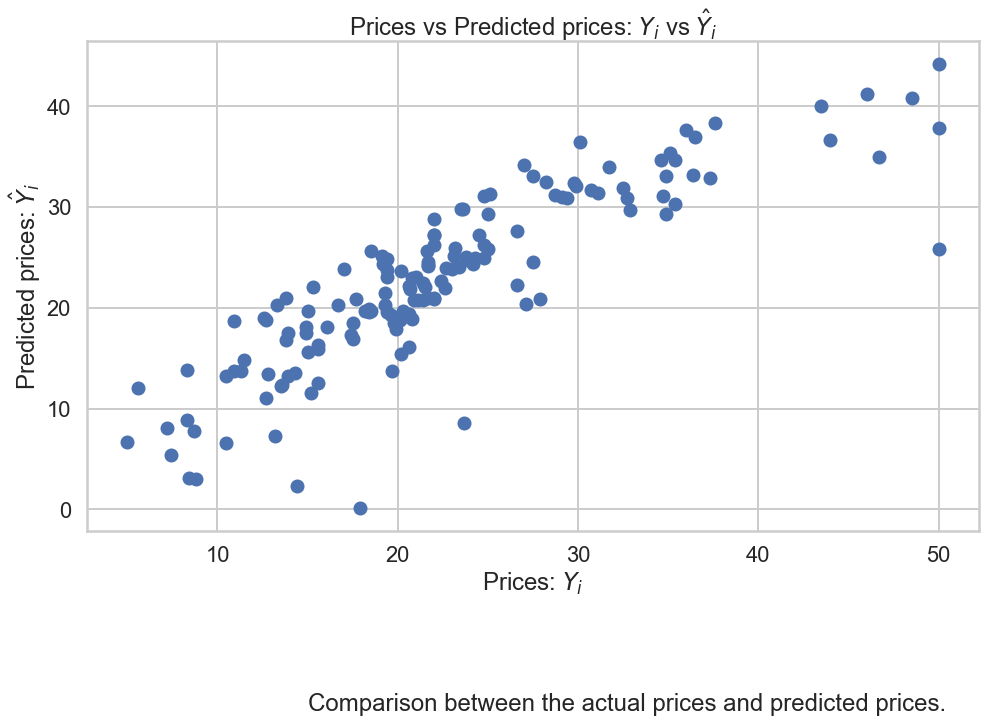

In [89]:
#Create scatter plot to visualize the differences between actual prices and predicted values
sns.set_style("whitegrid")
sns.set_context("poster")
plt.figure(figsize=(16,9))
plt.scatter(y_test, y_predict)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.text(15,-20, "Comparison between the actual prices and predicted prices.", ha='left')
plt.show()

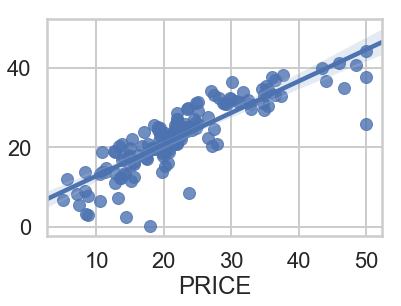

In [91]:
sns.regplot(y_test, y_predict, data=bos, fit_reg=True) #Plot Y_test and Y_pred for Linear Regression Model.

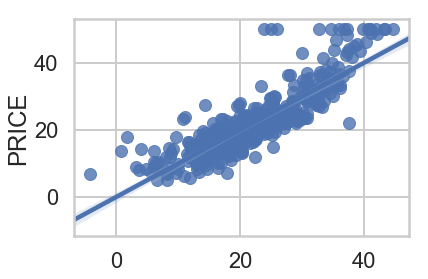

In [93]:
sns.regplot(x=lm.predict(X), y=bos['PRICE'], data=bos, fit_reg=True) #Plot predicted and actual Price values.

## Model Evaluation

In [95]:
#Calculating Mean Squared Error 
mse = sklearn.metrics.mean_squared_error(y_test, y_predict) #Mean Squared Error: To check the level of error of a model
print(mse)

23.038812866283706


In [97]:
#Calculating Root Mean Squared Error
rmse = mse ** 0.5 #Square root of mse (Mean Squared Error)
print(rmse)

4.799876338644956


In [98]:
print("The Root Mean Square Error (RMSE) for the Model is "+ str(rmse) +" and the Results can be further improved using feature extraction and rebuilding, training the model.")

The Root Mean Square Error (RMSE) for the Model is 4.799876338644956 and the Results can be further improved using feature extraction and rebuilding, training the model.
